# Predictive Modelling: Binary Classification with PCA

Author: Frauke Albrecht

<div>
<img src="Images/gran_agran.png" width="600"/>
</div>

**In this notebook we consider the binary classification problem granulocyte vs agranulocytes using a PCA to reduce the dimension and then applying several Machine Learning algorithms.**

The primary purpose of white blood cells is to protect the body from infection. White blood cells are produced by bone marrow and their levels of production are regulated by organs such as the spleen, liver, and kidneys. Types of leukocytes can be classified in standard ways. **Two pairs of broadest categories classify them either by structure (granulocytes or agranulocytes) or by cell lineage (myeloid cells or lymphoid cells).** 

**In this notebook we will consider the first classification method: granulocytes vs. agranulocytes.** Granulocytes contain granules or sacs in their cytoplasm and agranulocytes do not. Apart from lacking clearly visible granules, agranulocytes are also characterized by a single, large nucleus (the nucleus is not lobed). Each type of granulocyte and agranulocyte plays a slightly different role in fighting infection and disease. The three types of granulocytes are neutrophils, eosinophils, and basophils. The two types of agranulocytes are lymphocytes and monocytes.

Granulocytes are white blood cells that help the immune system to fight infections. The number of granulocytes increases in response to any infection and thus helps to detect a disease. The presence of granulocytes in the bloodstream is normal. These white blood cells are part of your immune system and help defend your body against harmful bacteria and viruses. However, a high number of granulocytes in the blood isn’t normal and usually indicates a health problem. Agranulocytes are involved in adaptive immunity (acquired immunity) and thus use immunological memory to act against invading pathogens. 

Our given datasets contains four different types of white blood cells, two of which are granulocytes (eosinophils, and neutrophils) and two are agranulocytes (lymphocytes and monocytes). We divide our dataset in two classes:
granulocytes and agranulocytes and make a binary classification. 

Source: https://en.wikipedia.org/wiki/White_blood_cell

## Setup

In [1]:
from glob import iglob
import pandas as pd
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score, classification_report, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path to save preprocessed train images (as dataframe)
path_train_csv = "dataset2-master/dataset2-master/images/TRAIN/"

# pathes to augmented test images for each class, where the background color has been changed
path_train_augm_c = ["dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL_c/"
                   , "dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL_c/"
                   , "dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE_c/"
                   , "dataset2-master/dataset2-master/images/TRAIN/MONOCYTE_c/"]

path_test_augm = ["dataset2-master/dataset2-master/images/TEST/test_img/EOSINOPHIL/"
                   , "dataset2-master/dataset2-master/images/TEST/test_img/NEUTROPHIL/"
                   , "dataset2-master/dataset2-master/images/TEST/test_img/LYMPHOCYTE/"
                   , "dataset2-master/dataset2-master/images/TEST/test_img/MONOCYTE/"]
#path_train_lables = 
# path to save preprocessed test images (as dataframe)
path_test_csv = "dataset2-master/dataset2-master/images/TEST/Test_csv/"

#path_test_simple_csv = "dataset2-master/dataset2-master/images/TEST_SIMPLE/Test_csv/"

## Read the data



In [3]:
# read the data (class1)
cells1 = pd.read_csv(path_train_csv + 'train_class1_E_c.csv')
#class1 = pd.read_csv(path_train_csv + 'train_class1_E_large.csv')
print(cells1.shape)
cells1.head()

(2497, 14408)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.861765,0.881373,0.883333,_18_9690,1,1,0,0,0,1
1,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.741176,0.756863,0.764706,_55_7307,1,1,0,0,0,1
2,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.774510,0.728431,0.727451,_31_1626,1,1,0,0,0,1
3,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_32_1223,1,1,0,0,0,1
4,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_70_1887,1,1,0,0,0,1


In [4]:
# read the data (class2)
cells2 = pd.read_csv(path_train_csv + 'train_class2_N_c.csv')
#class2 = pd.read_csv(path_train_csv + 'train_class2_N_large.csv')
print(cells2.shape)
cells2.head()

(2499, 14408)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/t...,0.878431,0.864706,0.868627,0.790196,0.770588,0.776471,0.801961,0.769608,0.780392,...,0.882353,0.882353,0.882353,_142_4726,2,0,1,0,0,1
1,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.881373,0.882353,0.880392,...,0.882353,0.882353,0.882353,_129_6939,2,0,1,0,0,1
2,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_34_7704,2,0,1,0,0,1
3,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_155_8195,2,0,1,0,0,1
4,dataset2-master/dataset2-master/images/TRAIN/t...,0.747059,0.615686,0.635294,0.733333,0.625490,0.707843,0.785294,0.724510,0.802941,...,0.882353,0.882353,0.882353,_45_3300,2,0,1,0,0,1


In [5]:
# read the data (class3)
cells3 = pd.read_csv(path_train_csv + 'train_class3_L_c.csv')
#class3 = pd.read_csv(path_train_csv + 'train_class3_L_large.csv')
print(cells3.shape)
cells3.head()

(2483, 14408)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/t...,0.703922,0.617647,0.594118,0.711765,0.535294,0.535294,0.698039,0.535294,0.521569,...,0.773529,0.697059,0.682353,_6_1405,3,0,0,1,0,0
1,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_13_4518,3,0,0,1,0,0
2,dataset2-master/dataset2-master/images/TRAIN/t...,0.772549,0.622549,0.623529,0.754902,0.602941,0.615686,0.767647,0.616667,0.615686,...,0.882353,0.882353,0.882353,_19_3956,3,0,0,1,0,0
3,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_12_5987,3,0,0,1,0,0
4,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.872549,0.882353,0.878431,_20_4702,3,0,0,1,0,0


In [6]:
# read the data (class4)
cells4 = pd.read_csv(path_train_csv + 'train_class4_M_c.csv')
#class4 = pd.read_csv(path_train_csv + 'train_class4_M_large.csv')
print(cells4.shape)
cells4.head()

(2478, 14408)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.880392,0.881373,...,0.882353,0.882353,0.882353,_4_825,4,0,0,0,1,0
1,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.881373,0.881373,0.881373,...,0.881373,0.881373,0.881373,_3_8282,4,0,0,0,1,0
2,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_8_9083,4,0,0,0,1,0
3,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.881373,0.882353,0.880392,...,0.702941,0.638235,0.637255,_9_5268,4,0,0,0,1,0
4,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_13_9280,4,0,0,0,1,0


In [7]:
# save all in 1 dataframe and delete the others
blood = cells1.copy()
blood = blood.append(cells2)
del cells1
blood = blood.append(cells3)
del cells2
blood = blood.append(cells4)
del cells3
del cells4
blood.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.861765,0.881373,0.883333,_18_9690,1,1,0,0,0,1
1,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.741176,0.756863,0.764706,_55_7307,1,1,0,0,0,1
2,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.774510,0.728431,0.727451,_31_1626,1,1,0,0,0,1
3,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_32_1223,1,1,0,0,0,1
4,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_70_1887,1,1,0,0,0,1


Granulocyte classes: [1 0]


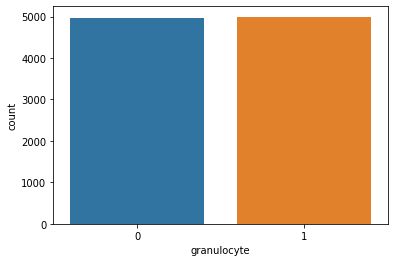

In [8]:
# The data is balanced
print("Granulocyte classes: " + str(blood["granulocyte"].unique()))
sns.countplot(x = blood["granulocyte"]);

## Baseline Model

### Metrics 

In order to define a baseline model, we need to decide for a metric, which we want to maximize. As base metrics we will consider the **accuracy** and the **auc score**. The accuracy gives the percentage of correct classification. Additionally, the auc score helps to select only models that achieve false positive and true positive rates (also called recall or sensitivity) that are above random chance. This is not guaranteed for accuracy. The **recall**  gives us the number of true positive tests compared to all positives. This metric is interesting, if you are trying to detect a desease and want to be sure to test everyone, who actaully has the desease as positive. The **precision** gives us the rate of all true positve tests to all positive tests. A high precision means a low false positive tests, which would be the objective, if you only want to get positive tests, when the person is really positive. Since our classification is no test in the sense of positive and negative results, that is none of the classes is more important, we will rely on the **accuray and the auc score**. To get the baseline accuracy we will use the model that always predicts the majority class. Our distribution is almost equal, there are a few more granulates in the observations. However, the difference is so low that the **baseline accuracy is 0.5**. The **auc score** of a random choice would be **0.5**, which we will use as the base value.

In [9]:
# number of granulocytes
print("Total numbers of observations: {}".format(blood.shape[0]))
print("Number of Granulocytes: {}".format(blood["granulocyte"].sum()))
print("Number of Agranulocytes: {}".format(blood.shape[0]-blood["granulocyte"].sum()))

Total numbers of observations: 9957
Number of Granulocytes: 4996
Number of Agranulocytes: 4961


In [10]:
# baselina accuracy = #granulates/#(all observations)
print("Baseline accuracy: {}".format(round(blood["granulocyte"].sum()/blood.shape[0],3)))

Baseline accuracy: 0.502


## Prepare the data for modelling

Note: We don't need to safe a test set as we already have a separate dataset given for testing. 

The data is ordered, so the first step we have to do is to shuffle the dataframe. We then define the features (the pixels) and the target (granulocyte). A principal component analysis (PCA) is then performed to reduce the dimension of the features. This is done together with a cross-validation with 5 folds. The results of the PCA are shown for the 5 folds.

### Shuffle the data

The data is shuffled by sampling the observations over the entire size of the dataframe. 

In [11]:
# shuffle the data
blood = blood.sample(frac=1).reset_index(drop=True)
blood.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/t...,0.740196,0.609804,0.570588,0.722549,0.598039,0.560784,0.712745,0.596078,0.565686,...,0.882353,0.882353,0.882353,_122_5161,2,0,1,0,0,1
1,dataset2-master/dataset2-master/images/TRAIN/t...,0.881373,0.881373,0.881373,0.880392,0.880392,0.880392,0.880392,0.879412,0.879412,...,0.882353,0.882353,0.882353,_10_3802,3,0,0,1,0,0
2,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_12_7478,3,0,0,1,0,0
3,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.880392,0.882353,0.881373,...,0.884314,0.874510,0.887255,_2_8507,1,1,0,0,0,1
4,dataset2-master/dataset2-master/images/TRAIN/t...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.878431,0.882353,0.878431,_23_4683,3,0,0,1,0,0


### Define Features and Target

The positions of the features (pixels) and the target (granulocyte) are set.

In [12]:
# Which indices do we need for the features? (=pixels)
blood.iloc[:,1:14401].head()

,0,1,2,3,4,5,6,7,8,9,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
0,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
1,0.829412,0.829412,0.808824,0.837255,0.837255,0.816667,0.839216,0.843137,0.819608,0.843137,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
2,0.815686,0.827451,0.866667,0.822549,0.839216,0.859804,0.819608,0.850000,0.843137,0.815686,...,0.878431,0.882353,0.882353,0.880392,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
3,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.859804,0.879412,0.878431,0.874510,0.878431,0.878431,0.884314,0.872549,0.878431,0.892157
4,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.617647,0.694118,0.603922,0.631373,0.689216,0.600000,0.635294,0.686275,0.615686,0.651961


In [13]:
# Which index do we need for the target? (=granulocyte)
blood.iloc[:,14407].head()

0    0
1    1
2    0
3    0
4    0
Name: granulocyte, dtype: int64

In [14]:
start_f = 1
end_f = 14401
idx_t = 14407

### Principal Component Analysis

The PCA is depending on the underlying dataset, that is performing the PCA to different parts of the data might lead to different results. To test the robustness of the PCA we use 5 subsets of it and perform it on each one with 90% of the explained variance. The results show that for all folds the feature importance resulting from the PCA is very similar (only marginal differences). The eigenvectors also look very similar (except sign differences). This leads to the conclusion that this is a robust operation and confirms the assumption that we can apply this transformation also to the test data. 

In [15]:
# kfold cross validation with 5 folds
# save pca components in dictionary pca_components = {'train/test_kfold': {train/test data}} 
# save y_train in dictionary y_cv = {'train/test_kfold': {train/test data}} 
kfold=5
X_cf = {}
pca_transformed = {}
pca_components = {}
pca_explained_variance = {}
pca_singular_values = {}
pca_projected = {}
y_cv = {}
i=0
kf = KFold(n_splits=kfold, shuffle=True, random_state=42)
for train_index, test_index in kf.split(blood):
    i+=1
    print("-"*20 + str(i) + ". fold validation" + "-"*20)
    #print("TRAIN:", train_index, "TEST:", test_index)
    train = blood.iloc[train_index]
    test =  blood.iloc[test_index]
    X_train = train.iloc[:,start_f:end_f]
    X_test = test.iloc[:,start_f:end_f]
    y_train = train.iloc[:,idx_t]
    y_test = test.iloc[:,idx_t]
    X_cf["train_"+str(i)] = X_train
    X_cf["test_"+str(i)] = X_test
    # PCA
    print("start PCA")
    #n_components=0.90 means it will return the Eigenvectors that have the 90% of the variation in the dataset
    blood_pca = PCA(n_components=0.9,svd_solver = 'full')
    blood_pca.fit(X_train)
    transformed_train = blood_pca.transform(X_train)
    transformed_test = blood_pca.transform(X_test)
    #save pcs in dictionary
    pca_transformed["train_"+str(i)] = transformed_train
    pca_transformed["test_"+str(i)] = transformed_test
    #save train sets in dictionary
    y_cv["train_"+str(i)] = y_train
    y_cv["test_"+str(i)] = y_test
    print("Shape of X_train before PCA: " + str(X_train.shape))
    print("Shape of X_test before PCA: " + str(X_test.shape))
    print("Shape of X_train after PCA: " + str(transformed_train.shape))
    print("Shape of X_test after PCA: " + str(transformed_test.shape))
    pca_explained_variance[str(i)] = blood_pca.explained_variance_ratio_
    #components
    pca_components[str(i)] = blood_pca.components_
    #singular values
    pca_singular_values[str(i)] = blood_pca.singular_values_
    #reconstruct images from PCs
    projected = blood_pca.inverse_transform(transformed_train)
    pca_projected[str(i)] = projected
    print("end PCA")

--------------------1. fold validation--------------------
start PCA
Shape of X_train before PCA: (7965, 14400)
Shape of X_test before PCA: (1992, 14400)
Shape of X_train after PCA: (7965, 391)
Shape of X_test after PCA: (1992, 391)
end PCA
--------------------2. fold validation--------------------
start PCA
Shape of X_train before PCA: (7965, 14400)
Shape of X_test before PCA: (1992, 14400)
Shape of X_train after PCA: (7965, 390)
Shape of X_test after PCA: (1992, 390)
end PCA
--------------------3. fold validation--------------------
start PCA
Shape of X_train before PCA: (7966, 14400)
Shape of X_test before PCA: (1991, 14400)
Shape of X_train after PCA: (7966, 392)
Shape of X_test after PCA: (1991, 392)
end PCA
--------------------4. fold validation--------------------
start PCA
Shape of X_train before PCA: (7966, 14400)
Shape of X_test before PCA: (1991, 14400)
Shape of X_train after PCA: (7966, 392)
Shape of X_test after PCA: (1991, 392)
end PCA
--------------------5. fold validati

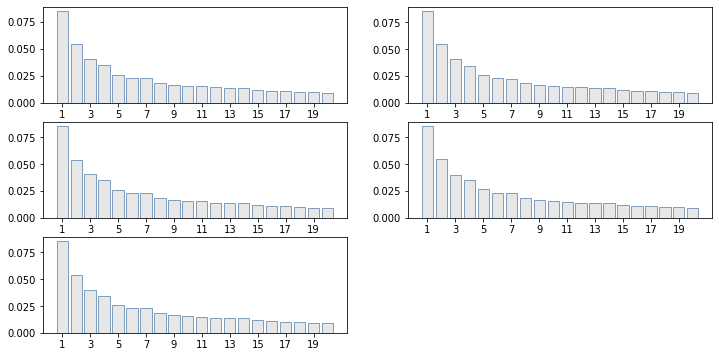

In [27]:
#importance of components
#plot explained variances of first 20 components
fig, axes = plt.subplots(3,2,figsize=(12,6))
plt.setp(axes, xticks=[1,3,5,7,9,11,13,15,17,19], xticklabels=['1', '3', '5','7','9','11','13','15','17','19']),
x = np.arange(1,21,1)
color = (0.1, 0.1, 0.1, 0.1)
edgecolor = (0.2, 0.4, 0.6, 0.6)

axes[0,0].bar(x, height=pca_explained_variance[str(1)][:20], color=color,  edgecolor=edgecolor);
#axes[0,0] = fig.add_axes([0,0,1,1])
axes[0,1].bar(x, height=pca_explained_variance[str(2)][:20], color=color,  edgecolor=edgecolor);
#axes[0,1] = fig.add_axes([0,0,1,1])
axes[1,0].bar(x, height=pca_explained_variance[str(3)][:20], color=color,  edgecolor=edgecolor);
#axes[1,0] = fig.add_axes([0,0,1,1])
axes[1,1].bar(x, height=pca_explained_variance[str(4)][:20], color=color,  edgecolor=edgecolor);
#axes[1,1] = fig.add_axes([0,0,1,1])
axes[2,0].bar(x, height=pca_explained_variance[str(5)][:20], color=color,  edgecolor=edgecolor);
#axes[2,0] = fig.add_axes([0,0,1,1])
fig.delaxes(axes[2,1])

In [28]:
# eigenvectors for all five folds
def plot_eigenv(comp):
    fig, axes = plt.subplots(2,10,figsize=(12,3),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.01, wspace=0.01))
    for i, ax in enumerate(axes.flat):
        img = comp[i].reshape(60,80,3)
        ax.imshow((img * 255).astype(np.uint8),cmap='gray')

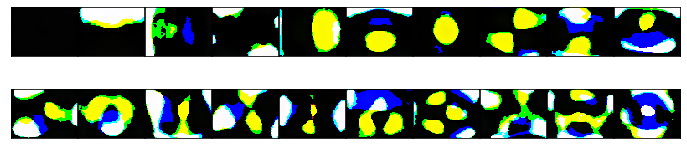

In [29]:
plot_eigenv(pca_components[str(1)])

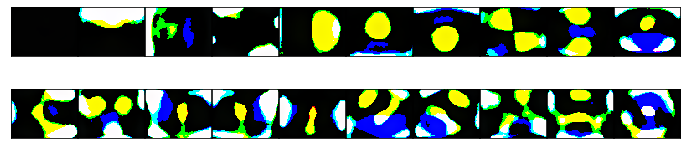

In [30]:
plot_eigenv(pca_components[str(2)])

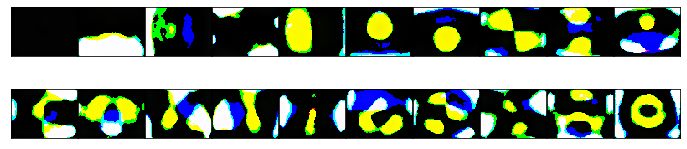

In [31]:
plot_eigenv(pca_components[str(3)])

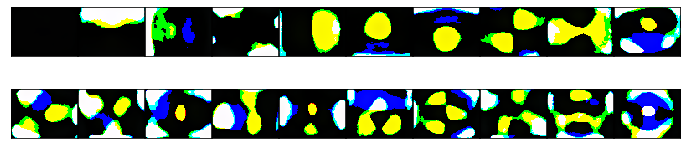

In [32]:
plot_eigenv(pca_components[str(4)])

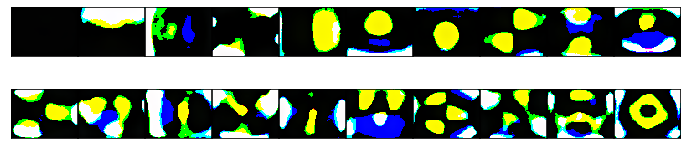

In [33]:
plot_eigenv(pca_components[str(5)])

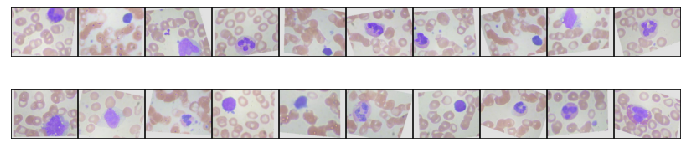

In [34]:
# images before pca
fig, axes = plt.subplots(2,10,figsize=(12,3), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    #img = np.asarray(blood.iloc[i,1:14401]).reshape(60,80,3)
    img = np.asarray(X_cf["train_"+str(1)])[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8))

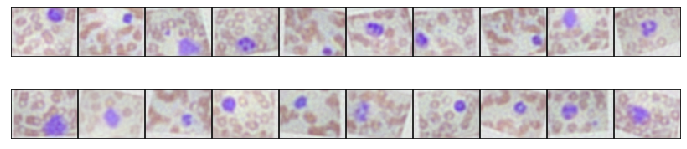

In [35]:
# reconstructed images from pca
fig, axes = plt.subplots(2, 10,figsize=(12,3), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = pca_projected[str(1)][i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8))

## Model Setup


Next we set up a set of models, which are evaluated by a set of metrics. The most important metrics for our case are the **accuracy and the roc auc score**. The resulting scores for the metrics are plotted for all considered models. 

### Principal Component Analyis

We saw that the results of the PCAs on the 5-folds all were very close to each other. We will now perform a PCA on the entire training set to reduce the dimension and then apply the models to this reduced space. We do not assume that this leads to great mistakes, as the results on the 5 subsets showed robust results. This procedure will make the following worksteps easier and faster to calculate on the notebook. 

In [12]:
# pca on entire trainingset
X_train = blood.iloc[:,1:14401]#
X_test = blood.iloc[:,1:14401]#
y_train = blood.iloc[:,14407]#
y_test = blood.iloc[:,14407]#  

blood_pca = PCA(n_components=0.8,svd_solver = 'full') 
blood_pca.fit(X_train)
transformed_train = blood_pca.transform(X_train)
transformed_test = blood_pca.transform(X_test)
print("Shape of X_train before PCA: " + str(X_train.shape))
print("Shape of X_test before PCA: " + str(X_test.shape))
print("Shape of X_train after PCA: " + str(transformed_train.shape))
print("Shape of X_test after PCA: " + str(transformed_test.shape))

Shape of X_train before PCA: (9957, 14400)
Shape of X_test before PCA: (9957, 14400)
Shape of X_train after PCA: (9957, 146)
Shape of X_test after PCA: (9957, 146)


In [13]:
# explained variances
blood_pca.explained_variance_ratio_[:20]

array([0.08509433, 0.05413226, 0.04043704, 0.0346093 , 0.02601542,
       0.02308868, 0.02265868, 0.0184757 , 0.0164644 , 0.01548135,
       0.01503459, 0.013933  , 0.01378614, 0.01350986, 0.0115636 ,
       0.01089246, 0.01049097, 0.01013635, 0.00950914, 0.00896084])

Sum of explained variance: 0.45


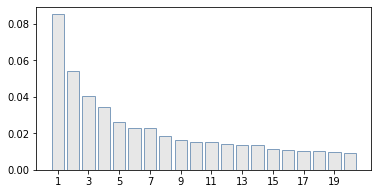

In [14]:
#importance of components
#plot explained variances of first 20 components
fig, axes = plt.subplots(1,1,figsize=(6,3))
plt.setp(axes, xticks=[1,3,5,7,9,11,13,15,17,19], xticklabels=['1', '3', '5','7','9','11','13','15','17','19']),
#        yticks=[1, 2, 3])
x = np.arange(1,21,1)
color = (0.1, 0.1, 0.1, 0.1)
edgecolor = (0.2, 0.4, 0.6, 0.6)
#x = np.arange(1,4,1)
axes.bar(x, height=blood_pca.explained_variance_ratio_[0:20], color=color,  edgecolor=edgecolor);
#axes.bar(x, height=blood_pca.explained_variance_ratio_);
print("Sum of explained variance: {:.2f}".format(blood_pca.explained_variance_ratio_[0:20].sum()))

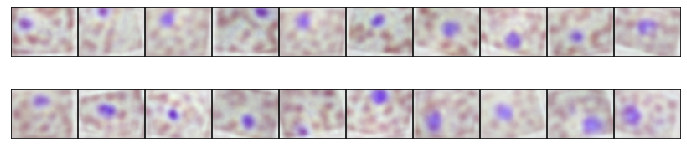

In [15]:
# reconstructed images from pca
pca_projected = blood_pca.inverse_transform(transformed_train)

fig, axes = plt.subplots(2, 10,figsize=(12,3), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = pca_projected[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8))

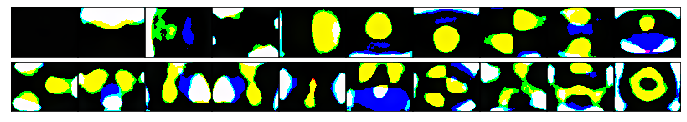

In [16]:
# eigenvectors
fig, axes = plt.subplots(2,10,figsize=(12,2),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = blood_pca.components_[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8),cmap='gray')

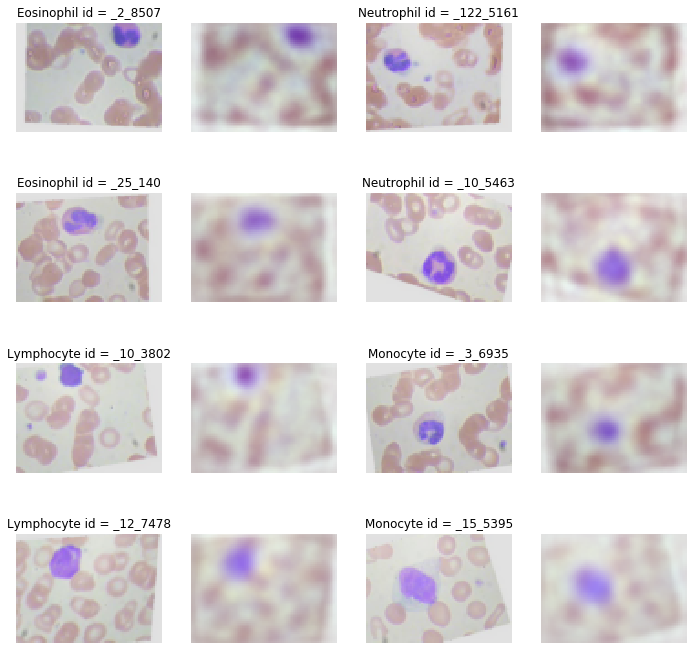

In [17]:
# plot some images before and after pca
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
n = 16
m1 = m2 = m3 = m4 = 0

for i in range(blood.shape[0]):
    if (blood.iloc[i,14402] == 1) & (m1<2): # first category
        m1 += 1
        current_id = blood.iloc[i,14401]         
        axes[m1-1,0].set_title("Eosinophil id = " + current_id)
        img = np.asarray(X_train)[i].reshape(60,80,3)
        axes[m1-1,0].imshow((img * 255).astype(np.uint8))
        axes[m1-1,0].axis('off')

        img = pca_projected[i].reshape(60,80,3)
        axes[m1-1,1].imshow((img * 255).astype(np.uint8))
        axes[m1-1,1].axis('off')
        
    if (blood.iloc[i,14402] == 2) &  (m2<=1): # second category
        m2 += 1
        current_id = blood.iloc[i,14401]         
        axes[m2-1,2].set_title("Neutrophil id = " + current_id)
        img = np.asarray(X_train)[i].reshape(60,80,3)
        axes[m2-1,2].imshow((img * 255).astype(np.uint8))
        axes[m2-1,2].axis('off')
        
        img = pca_projected[i].reshape(60,80,3)
        axes[m2-1,3].imshow((img * 255).astype(np.uint8))        
        axes[m2-1,3].axis('off')
        
    if (blood.iloc[i,14402] == 3) & (m3<=1): # third category
        m3 += 1
        current_id = blood.iloc[i,14401]         
        axes[m3+1,0].set_title("Lymphocyte id = " + current_id)
        img = np.asarray(X_train)[i].reshape(60,80,3)
        axes[m3+1,0].imshow((img * 255).astype(np.uint8))
        axes[m3+1,0].axis('off')
        
        img = pca_projected[i].reshape(60,80,3)
        axes[m3+1,1].imshow((img * 255).astype(np.uint8))        
        axes[m3+1,1].axis('off')
        
    if (blood.iloc[i,14402] == 4)  & (m4<=2): # fourth category
        m4 += 1
        current_id = blood.iloc[i,14401]         
        axes[m4,2].set_title("Monocyte id = " + current_id)
        img = np.asarray(X_train)[i].reshape(60,80,3)
        axes[m4,2].imshow((img * 255).astype(np.uint8))
        axes[m4,2].axis('off')
        
        img = pca_projected[i].reshape(60,80,3)
        axes[m4,3].imshow((img * 255).astype(np.uint8)) 
        axes[m4,3].axis('off')

    if(m1>=2 & m2>=2 & m3>2 & m4>2):
        break

### Test different Models

We set up some possible models we can use for the classification problem and evaluate their results. We will use cross-validation to evaluate the models. 

**NOTE:** We have to keep in mind that we are working with augmented images that is training and validation set cannot be regarded as 100% independed as the same imgages augmented in a different way may be in the training and in the validation set. The only dataset really independent is the test set. Some tests showed that KNeighborsClassifier and SVC tend to overfit. When the number of *n_neighbors* is set too low, KNeighborsClassifier reaches very high values in training, but much lower in testing. The same is true for the values of gamma and *C* in *SVC*. That is why we have defined them different than the default values. 

In [65]:
# Define a list of possible models
clfs = [LogisticRegression(solver="lbfgs", random_state=42)
       , KNeighborsClassifier(n_neighbors= 15)
       , GaussianNB()
       , SVC(C=10, random_state=42, gamma=0.001)
       , LinearSVC(random_state=42)
       , RandomForestClassifier(n_estimators=500, criterion="gini", max_depth=5, random_state=42)
       , AdaBoostClassifier(random_state=42)
       , XGBClassifier(random_state=42)]

In [66]:
# Function that performs cross validation and returns the desired metric(s)
# The metrics are stored in a dictionary
def model_evaluation_cv(X_train, y_train, clf, params_model=None, 
                     params_cross={"cv":5, "scoring":['accuracy','precision','recall','roc_auc','f1']}):
    
    # cross validation
    scores = cross_validate(clf, X_train, y_train, **params_cross)
    #print(scores)
    # return the list of all dictionary keys with mean values (mean over metrics from folds) 
    scores = {key: value.mean() for (key, value) in scores.items()}

    return scores

In [67]:
# Perform the model evaluation for all models in clf and cross folds
# Save the results in a dictionary, as follows: results ={'clf': {metrics}}
#kfold=5
results = {}
for clf in clfs:
    clf_name = clf.__class__.__name__
    scores = model_evaluation_cv(X_train = transformed_train, y_train = y_train, clf = clf)
    results[clf_name] = scores        
#print(results)

/Users/frauke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/frauke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/frauke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/frauke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/frauke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to conver

In [68]:
# Function for the plots
# "results" is the dictionary containing the scores
# Remember: results = {'clf': {'cross_fold': {metrics}}

def plot_results(scores_mean, legend_labels, title='Model Comparison'):
    width = 0.5
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_facecolor((1.0, 250/255, 234/255))
    clfs = list(scores_mean.keys())
    x = np.arange(0, (len(clfs)+1)*(len(legend_labels)-2), len(clfs)+1)
    for clf in clfs:        
        score_list = []
        x+=1
        for score in scores_mean[clf]:
            if (score!="fit_time") and (score!="score_time"):
                #score_list contains all scores for one model
                score_list.append(scores_mean[clf][score])
        rects1 = ax.bar(x - width/2, score_list, width, label=clf, alpha=1)
        ax.set_ylabel('score')
        ax.set_title(title)
        ax.set_ylim(0.5,1)
        ax.set_xticks(x-len(clfs)/2)
        ax.set_xticklabels(score_labels[2:])
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True)

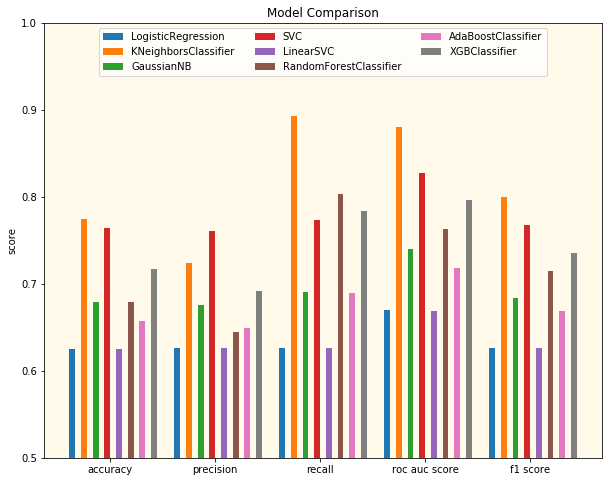

In [69]:
score_labels = ["fit time", "score time", "accuracy", "precision", "recall", "roc auc score", "f1 score"]
plot_results(results, score_labels)

In [70]:
#store scores in dataframe
def df_scores(scores_mean, legend_labels):
    
    clfs    = list(scores_mean.keys())
    metrics = legend_labels
    data = { "metric": [metrics[0], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6]]}
    df = pd.DataFrame (data, columns = ["metric"])
    x = np.arange(0, (len(legend_labels)+2)*(len(legend_labels)+1), len(clfs)+2)
    for clf in clfs:   
        score_list = []
        x += 1
        for score in scores_mean[clf]:
            score_list.append(round(scores_mean[clf][score],3))
        df[clf] = score_list 
    return df

In [71]:
score_labels = ["fit time", "score time","accuracy", "precision", "recall", "roc auc score", "f1 score"]
scores_df = df_scores(results,score_labels).set_index("metric")
scores_df

,LogisticRegression,KNeighborsClassifier,GaussianNB,SVC,LinearSVC,RandomForestClassifier,AdaBoostClassifier,XGBClassifier
metric,,,,,,,,
fit time,0.213,0.088,0.078,21.695,7.458,31.838,12.048,21.365
score time,0.017,19.642,0.037,7.091,0.016,0.423,0.146,0.041
accuracy,0.625,0.775,0.679,0.764,0.625,0.679,0.657,0.717
precision,0.626,0.724,0.676,0.761,0.626,0.644,0.650,0.692
recall,0.626,0.893,0.691,0.774,0.626,0.803,0.689,0.784
roc auc score,0.670,0.880,0.741,0.827,0.669,0.763,0.718,0.797
f1 score,0.626,0.799,0.683,0.767,0.626,0.715,0.669,0.735


## Hyperparameter Tuning

We see that the two models **KNeighborClassifier** and **SVC** give the best results. However, as we have seen in some tests (not shown) these models tend to overfit. The parameters of *n_neighbors*, *C* and *gamma* are therefore on purpose only set in a certain intervall for the gridsearch. We also consider the **RandomForestClassifier** and **XGBClassifier** for further parameter tuning. We tune the models towards **accuracy**.

In [72]:
# Decide for 4 models
clfs_sel = [SVC(C=1, kernel="rbf", gamma='scale', random_state=42)
            , KNeighborsClassifier(n_neighbors=5)
            , RandomForestClassifier(random_state=42)
            , XGBClassifier(random_state=42)]

param_sets = [
              # parameters for svc
                { 'kernel': ['poly','rbf']
                , 'C': [10, 100, 1000]
                , 'gamma':[0.001, 0.0001]
                , 'probability':[True]}
                #, 'n_jobs':[-1]}  
              # parameters for knn  
                , { 'n_neighbors': [10, 15, 20]
                , 'weights': ['uniform','distance']
                , 'leaf_size':[10,30,50]
                , 'p':[1,2,3]}
                #, 'n_jobs':[-1]} 
              # parameters for RandomForest
                 , { 'n_estimators':[200, 300, 400, 500]
                 , 'criterion':['gini', 'entropy']
                 , 'max_depth':[2, 4, 6, 8, 10]
                 , 'n_jobs':[-1]}
              # parameters for XGBoost
                 , {'n_estimators': [100, 300, 500]
                 , 'max_depth': [4, 6, 8]
                 , 'learning_rate': [0.5, 0.1, 0.01, 0.05]
                 , 'colsample_bytree': [1]
                 , 'min_child_weight' : [1]
                 , 'gamma'            : [ 0.0, 0.2 , 0.4 ]
                 , 'n_jobs':[-1]}  
            ]

In [73]:
# Gridsearch with scoring accuracy, returns the best estimator
def grid_search(X_train, y_train, clf, param):
    #CLF = GridSearchCV(clf, param, scoring='roc_auc', n_jobs=-1, cv=5)
    CLF = GridSearchCV(clf, param, scoring='accuracy', n_jobs=-1, cv=5)
    best_clf = CLF.fit(X_train, y_train)
    return best_clf.best_estimator_

In [74]:
def grid_search_res(X_train, y_train, clfs, param_sets):
    # perform the grid-search over all scenarios and all classifiers
    # and save the results in a dictionary: grid_search_results = {clf: {}}
    grid_search_results = {}
    for clf, param_set in zip(clfs_sel, param_sets):
        print(clf.__class__.__name__)
        print(param_set)
        grid_search_results[clf.__class__.__name__] = grid_search(X_train, y_train, clf, param_set)
    # evaluate the best classifiers and return the scores
    # safe scores in a dictionary: grid_search_scores = {clf: {scores}}
    print(grid_search_results)
    grid_search_scores = {}
    for clf in clfs:
        clf_name = clf.__class__.__name__
        scores = model_evaluation_cv(X_train, y_train, clf)
        grid_search_scores[clf_name] = scores 
    print(grid_search_scores)
    return grid_search_results, grid_search_scores

In [75]:
grid_search_results, grid_search_scores = grid_search_res(transformed_train, y_train, clfs_sel, param_sets)

SVC
{'kernel': ['poly', 'rbf'], 'C': [10, 100, 1000], 'gamma': [0.001, 0.0001], 'probability': [True]}


/Users/frauke/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KNeighborsClassifier
{'n_neighbors': [10, 15, 20], 'weights': ['uniform', 'distance'], 'leaf_size': [10, 30, 50], 'p': [1, 2, 3]}
RandomForestClassifier
{'n_estimators': [200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10], 'n_jobs': [-1]}
XGBClassifier
{'n_estimators': [100, 300, 500], 'max_depth': [4, 6, 8], 'learning_rate': [0.5, 0.1, 0.01, 0.05], 'colsample_bytree': [1], 'min_child_weight': [1], 'gamma': [0.0, 0.2, 0.4], 'n_jobs': [-1]}
{'SVC': SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False), 'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance'), 'RandomForestClassifier': RandomForestClassifier(boo

In [76]:
best_models = grid_search_results
best_models

{'SVC': SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
     max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
     verbose=False),
 'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                      weights='distance'),
 'RandomForestClassifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=10, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=500,
                        n_jobs=-1, oob_score=False, random_state=42, ve

In [77]:
best_scores = grid_search_scores
best_scores

{'SVC': {'fit_time': 19.314117908477783,
  'score_time': 7.561182832717895,
  'test_accuracy': 0.8641157296186253,
  'test_precision': 0.8649739938224246,
  'test_recall': 0.8640926926926926,
  'test_roc_auc': 0.9313187275654385,
  'test_f1': 0.8645224827868695},
 'KNeighborsClassifier': {'fit_time': 0.08011126518249512,
  'score_time': 13.651130390167236,
  'test_accuracy': 0.8689353092934269,
  'test_precision': 0.8649788143329674,
  'test_recall': 0.8754968968968969,
  'test_roc_auc': 0.936155576345012,
  'test_f1': 0.8701798539794741},
 'RandomForestClassifier': {'fit_time': 8.22075333595276,
  'score_time': 0.08877501487731934,
  'test_accuracy': 0.7603701596945289,
  'test_precision': 0.7594545986821757,
  'test_recall': 0.7644148148148149,
  'test_roc_auc': 0.8436699922143012,
  'test_f1': 0.7618705660920452},
 'XGBClassifier': {'fit_time': 10.60172004699707,
  'score_time': 0.03327178955078125,
  'test_accuracy': 0.7165800822577099,
  'test_precision': 0.6921974120550893,
  'te

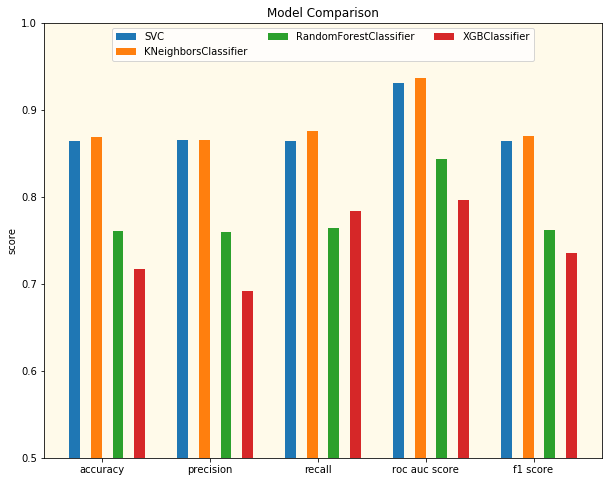

In [78]:
# plot scores
score_labels = ["fit time", "score time", "accuracy", "precision", "recall", "roc auc score", "f1 score"]
plot_results(grid_search_scores, score_labels)

In [79]:
score_labels = ["fit time", "score time","accuracy", "precision", "recall", "roc auc score", "f1 score"]
scoresh_df = df_scores(grid_search_scores,score_labels).set_index("metric")
scoresh_df

,SVC,KNeighborsClassifier,RandomForestClassifier,XGBClassifier
metric,,,,
fit time,19.314,0.080,8.221,10.602
score time,7.561,13.651,0.089,0.033
accuracy,0.864,0.869,0.760,0.717
precision,0.865,0.865,0.759,0.692
recall,0.864,0.875,0.764,0.784
roc auc score,0.931,0.936,0.844,0.797
f1 score,0.865,0.870,0.762,0.735


KneighborsClassifier and SVC both achieve very good results for all metrics, especially the auc score. However, as mentioned above we have to keep in mind that the cross-validation is not 100% independent and both models showed problems in overfitting while testing (not shown). 

As our final model we will use a stacked model from these four models. The stacking is done via logarithmic regression.

## Evaluate Model on Test Set

Before evaluating the results on the test data, this has to be brought in the same format as our train data is. That is the feature engineering part from notebook 1. A function to convert the test data into the needed format is given in notebook 1. 

We use stacking to use the best performing model for prediction.

### Read the test Data

In [56]:
# read kaggle test set
X_class1E_kaggle = pd.read_csv(path_test_csv + 'test_class1_E.csv')
X_class2N_kaggle = pd.read_csv(path_test_csv + 'test_class2_N.csv')
X_class3L_kaggle = pd.read_csv(path_test_csv + 'test_class3_L.csv')
X_class4M_kaggle = pd.read_csv(path_test_csv + 'test_class4_M.csv')
print("Shapes of the data")
print("eosinophil: {}".format(X_class1E_kaggle.shape))
print("nithrophil: {}".format(X_class2N_kaggle.shape))
print("lymphocyte: {}".format(X_class3L_kaggle.shape))
print("monocyte: {}".format(X_class4M_kaggle.shape))
# save all in 1 dataframe and delete the others
X_test_kaggle = X_class1E_kaggle.copy()
X_test_kaggle = X_test_kaggle.append(X_class2N_kaggle)
del X_class1E_kaggle
X_test_kaggle = X_test_kaggle.append(X_class3L_kaggle)
del X_class2N_kaggle
X_test_kaggle = X_test_kaggle.append(X_class4M_kaggle)
del X_class3L_kaggle
del X_class4M_kaggle
X_test_kaggle.reset_index(inplace=True,drop=True)
X_test_kaggle.head()

Shapes of the data
eosinophil: (623, 14408)
nithrophil: (624, 14408)
lymphocyte: (620, 14408)
monocyte: (620, 14408)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TEST/EO...,0.797059,0.836275,0.797059,0.806863,0.839216,0.801961,0.814706,0.842157,0.806863,...,0.882353,0.882353,0.882353,_11_6757,1,1,0,0,0,1
1,dataset2-master/dataset2-master/images/TEST/EO...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_7_986,1,1,0,0,0,1
2,dataset2-master/dataset2-master/images/TEST/EO...,0.792157,0.792157,0.797059,0.787255,0.781373,0.782353,0.800000,0.786275,0.778431,...,0.882353,0.882353,0.882353,_3_9885,1,1,0,0,0,1
3,dataset2-master/dataset2-master/images/TEST/EO...,0.866667,0.864706,0.864706,0.791176,0.749020,0.733333,0.756863,0.622549,0.590196,...,0.882353,0.882353,0.882353,_11_3152,1,1,0,0,0,1
4,dataset2-master/dataset2-master/images/TEST/EO...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.799020,0.785294,0.768627,_2_1953,1,1,0,0,0,1


In [57]:
X_test_kaggle.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
2482,dataset2-master/dataset2-master/images/TEST/MO...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.698039,0.609804,0.617647,_1_1704,4,0,0,0,1,0
2483,dataset2-master/dataset2-master/images/TEST/MO...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_3_40,4,0,0,0,1,0
2484,dataset2-master/dataset2-master/images/TEST/MO...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.694118,0.600000,0.584314,_2_7955,4,0,0,0,1,0
2485,dataset2-master/dataset2-master/images/TEST/MO...,0.752941,0.729412,0.677451,0.796078,0.779412,0.738235,0.788235,0.776471,0.750980,...,0.772549,0.796078,0.782353,_0_5219,4,0,0,0,1,0
2486,dataset2-master/dataset2-master/images/TEST/MO...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_3_8583,4,0,0,0,1,0


In [58]:
X_test_kaggle.iloc[:,1:14401].head()

,0,1,2,3,4,5,6,7,8,9,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
0,0.797059,0.836275,0.797059,0.806863,0.839216,0.801961,0.814706,0.842157,0.806863,0.821569,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
1,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
2,0.792157,0.792157,0.797059,0.787255,0.781373,0.782353,0.800000,0.786275,0.778431,0.782353,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
3,0.866667,0.864706,0.864706,0.791176,0.749020,0.733333,0.756863,0.622549,0.590196,0.756863,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
4,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.698039,0.692157,0.662745,0.676471,0.734314,0.713725,0.705882,0.799020,0.785294,0.768627


In [59]:
X_test_kaggle.iloc[:,14407].head()

0    1
1    1
2    1
3    1
4    1
Name: granulocyte, dtype: int64

In [60]:
X_test_kaggle.shape

(2487, 14408)

In [61]:
X_testK = X_test_kaggle.iloc[:,1:14401]
y_testK = X_test_kaggle.iloc[:,14407]

In [62]:
y_kaggle_pred  = pipe_clf.predict(X_testK)
y_kaggle_score = pipe_clf.predict_proba(X_testK)[:,1]

### Build Pipeline for Predictions

We stack the four models and before applying them we apply the PCA. We put all together in a pipeline. We apply this pipeline to the test set and have a look at the metrics. We achieve an **accuracy of 0.77** and an **auc score of 0.75**.

In [81]:
pca = PCA(n_components=0.8,svd_solver = 'full')

In [82]:
# stacking
clf1 = grid_search_results['SVC']
clf2 = grid_search_results['KNeighborsClassifier']
clf3 = grid_search_results['RandomForestClassifier']
clf4 = grid_search_results['XGBClassifier']

lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

In [83]:
pipe_clf = Pipeline([
    ('pca',pca),
    ('clf',sclf)
    ])
pipe_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.8,
                     random_state=None, svd_solver='full', tol=0.0,
                     whiten=False)),
                ('clf',
                 StackingClassifier(average_probas=False,
                                    classifiers=[SVC(C=1000, break_ties=False,
                                                     cache_size=200,
                                                     class_weight=None,
                                                     coef0=0.0,
                                                     decision_function_shape='ovr',
                                                     degree=3, gamma=0.001,
                                                     kernel='poly', max_ite...
                                    meta_classifier=LogisticRegression(C=1.0,
                                                                       class_weight=None,
   

In [84]:
y_kaggle_pred  = pipe_clf.predict(X_testK)
y_kaggle_score = pipe_clf.predict_proba(X_testK)[:,1]

In [85]:
# calculate scores
print('test accuracy: {:.2f}'.format(accuracy_score(y_true=y_testK, y_pred=y_kaggle_pred)))
print('precision: {:.2f}'.format(precision_score(y_true=y_testK, y_pred=y_kaggle_pred)))
print('recall: {:.2f}'.format(recall_score(y_true=y_testK, y_pred=y_kaggle_pred)))
print('roc auc Score: {:.2f}'.format(roc_auc_score(y_true=y_testK, y_score=y_kaggle_score)))
print('f1: {:.2f}'.format(f1_score(y_true=y_testK, y_pred=y_kaggle_pred)))

test accuracy: 0.57
precision: 0.54
recall: 0.89
roc auc Score: 0.62
f1: 0.68


roc auc score: 0.62 


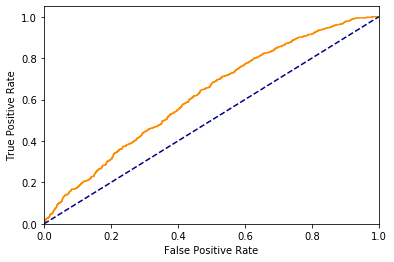

In [86]:
# roc curve
fpr, tpr, threshold = roc_curve(y_testK, y_kaggle_score)
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("roc auc score: {} ".format(round(roc_auc_score(y_testK, y_kaggle_score),2)))

In [89]:
# confusion matrix
confusion_matrix(y_true=y_testK, y_pred=y_kaggle_pred)

array([[ 304,  936],
       [ 132, 1115]])

In [90]:
# classification_report
print(classification_report(y_true=y_testK, y_pred=y_kaggle_pred))

              precision    recall  f1-score   support

           0       0.70      0.25      0.36      1240
           1       0.54      0.89      0.68      1247

    accuracy                           0.57      2487
   macro avg       0.62      0.57      0.52      2487
weighted avg       0.62      0.57      0.52      2487



### Analyse the Scores

Have a closer look at the scores. Especially at the number of observations that have been labeled with 0 , but with a probability of more than 0.4 and less than 0.1, respectivley. The large majority of these observations have a probability of less than 0.1, which means that the model is "quite sure" in its decision. Analogue for the observations labeled with 1. Although in the latter case the ratio of "unsure" predictions is higher.

In [100]:
# have a closer look at the scores
sc_0  = [round(sc,3) for sc in y_kaggle_score if sc <= 0.5]
sc_01 = [round(sc,3) for sc in sc_0 if sc > 0.4]
sc_02 = [round(sc,3) for sc in sc_0 if sc < 0.1]
print('classified as 0:')
print(len(sc_0))
print('classified as 0 with probability of more than 0.4:')
print(len(sc_01))
print('classified as 0 with probability of less than 0.1:')
print(len(sc_02))

classified as 0:
436
classified as 0 with probability of more than 0.4:
51
classified as 0 with probability of less than 0.1:
214


In [101]:
# have a closer look at the scores
sc_1 = [round(sc,3) for sc in y_kaggle_score if sc > 0.5]
sc_11 = [round(sc,3) for sc in sc_1 if sc < 0.6]
sc_12 = [round(sc,3) for sc in sc_1 if sc > 0.9]
print('classified as 1:')
print(len(sc_1))
print('classified as 0 with probability of more than 0.9:')
print(len(sc_12))
print('classified as 0 with probability of less than 0.6:')
print(len(sc_11))

classified as 1:
2051
classified as 0 with probability of more than 0.9:
1710
classified as 0 with probability of less than 0.6:
52


In [102]:
# eosinophil = gran 
x1 = X_test_kaggle.iloc[0:623,1:14401]
y1 = X_test_kaggle.iloc[0:623,14407]
y1_pred  = pipe_clf.predict(x1)
y1_score = pipe_clf.predict_proba(x1)[:,1]
#print("Image id:{}".format(X_test_kaggle.iloc[0:626,14401]))
print("True value: {}".format(X_test_kaggle.iloc[0:623,14407].sum()))
print("Prediction: {}".format(y1_pred.sum()))
#print("Prediction score: {:.3f}".format(y1_score))

True value: 623
Prediction: 565


In [103]:
# nithrophil = gran 
x2 = X_test_kaggle.iloc[624:1247,1:14401]
y2 = X_test_kaggle.iloc[624:1247,14407]
y2_pred  = pipe_clf.predict(x2)
y2_score = pipe_clf.predict_proba(x2)[:,1]
print("True value: {}".format(X_test_kaggle.iloc[627:1247,14407].sum()))
print("Prediction: {}".format(y2_pred.sum()))

True value: 620
Prediction: 549


In [104]:
# lymphocyte = agran 
x3 = X_test_kaggle.iloc[1248:1868,1:14401]
y3 = X_test_kaggle.iloc[1248:1868,14407]
y3_pred  = pipe_clf.predict(x3)
y3_score = pipe_clf.predict_proba(x3)[:,1]
print("True value: {}".format(X_test_kaggle.iloc[1248:1868,14407].sum()))
print("Prediction: {}".format(y3_pred.sum()))

True value: 0
Prediction: 395


In [105]:
# monocyte = agran 
x4 = X_test_kaggle.iloc[1869:2487,1:14401]
y4 = X_test_kaggle.iloc[1869:2487,14407]
y4_pred  = pipe_clf.predict(x4)
y4_score = pipe_clf.predict_proba(x4)[:,1]
print("True value: {}".format(X_test_kaggle.iloc[1871:2491,14407].sum()))
print("Prediction: {}".format(y4_pred.sum()))

True value: 0
Prediction: 539


## Summary & Conclusions

We see that the model is overfitting. That is the accuracy is lower on the test set than on the training set. This is propably due to the data construction. We are working with augmented images in the training set. However, the augmented images share a lot of information, that is the validation datasets during cross-validation is not independend from the training set. In contrast to that the test data is completely independed. The original images have been separated in train and test datasets and then augmented. A way to prevent this overfitting would be to train only the original images. However, there are only about 400 images.

Further the precision is very low for our model. Most of the error in the model occurs due to classifying no granulocytes as granulocytes.

It appears that this model is not very suitable to tackle the problem of classifying our given data.

## Outlook

In the next notebook (03) we will analyse another binary classification problem: Classifying lymphocytes vs. the rest. We will use the same technique.

The next step after that will be to analyse a multiple classification problem considering all four white blood cell types. This will be done in notebook 04 using a CNN.